# COGS 108 Final Project

# Overview
<p>Our project is basically using regressions and decision tree to predict the effectiveness of several different factors within 5 catagories (Education, Income, Sex Orientation, Race and Cheating) on the quality of relationship. We first trained our model with 80% of the data using regression and then we found out that our regression model is not predictive. Then we switch to decision tree, which works well with categorical data Finally we completed our preditions with a high precision and made our conclusion.</p>

<h1>Names</h1> 
<ul>
    <li>Hongyu Zou</li>
    <li>Sergio Villazon</li>
    <li>Marissa Valenzuela</li>
    <li>Mathew Sanouvong</li>
    <li>oldwin Pang</li>
</ul>

<h1>Group Member IDs</h1> 
<ul>
    <li>A14553614</li>
    <li>A13495944</li>
    <li>A13873376</li>
    <li>A14159017</li>
    <li>A15325500</li>
</ul>

# Part 1: Introduction

## Background 

<p style="font-size:15px">Currently first marriages have a divorce rate of 40-50%, while subsequent marriages have an even higher rate of divorce. Based on the current landscape for dating and the high diversity of peoples’ romantic partners, we concluded that it would be in our interest to investigate the different aspects between romantic partners and how that relates to the overall quality of their relationship. The aspects we plan to look into include information between romantic partners such as house income, education, whether or not they used the internet when dating, sexual orientation, and racial demographic.

<p style="font-size:15px">
The quality of the relationship plays an important part in our study for determining how sharing different aspects can affect the relationship between two partners. It is assumed that a good relationship entails loyalty between partners and often they would describe their relationships positively. Using these assumptions as a form of qualitative measurements, we will judge the quality of relationships as part of our analysis. Poor quality relationships that often contribute to the high divorce rates could be a result of certain aspects between romantic partners and our goal for this analysis is to discover how these aspects compare to one another when determining the quality of relationships. 
</p>

## Reformulated Research Question

<p style="font-size:15px"><b>General Question:</b> Which features amongst people result in the highest quality of romantic relationships with their partners?
</p>
<p style="font-size:15px">
<b>Specific Question:</b> How do certain factors between romantic partners compare to others when gauging the quality of their romantic relationship?
</p>
<p>

## Hypothesis

<p style="font-size:15px" >
Race may be the biggest factor to consider between couples when measuring the quality of their relationship due in part to the cultural differences or similarities that may result between the romantic partners. Other factors may fall short in importance.
</p>

## Datasets

<b style="font-size:15px">DATA: https://data.stanford.edu/hcmst2017
</b>
<p style="font-size:15px">
This public data set consists of survey results from the Stanford Couples Study that examines how couples meet. A key focus of the study is the trend in relationships that is shared between people with romantic partners. The survey consists of 3510 completed surveys consisting of adults age 18+ residing in the United States. Out of the variables contained in the dataset, the following are the most applicable to our study:
How the couples met initially
Whether or not they used an online service to meet
Quality of relationship (Quantified to be 1-5)
Fidelity / Faithfulness of relationship
Sex Frequency
</p>

<p style="font-size:15px">
With this data set, we intend to take information regarding the quality of the relationships that we find through the various responses. The responses span from demographic information about the participants to specific information regarding their relationship statuses with their partners. After sorting out which data we find relevant or not to our analysis, we will use work on web scraping the data to better visualize the responses. Our focus will be on gathering the information about certain aspects of a relationship such as race and education, then finding responses that help us realize the quality of their relationship. The information may include items such as whether the participant met their partner online or in person.
</p>

# Part 2: Setup & Data cleaning & Wrangling

<h3>1. import libraries</h3>

In [1]:
# Imports
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer
import patsy 
import scipy.stats as stats
import copy
import pydotplus
import io

from IPython.display import Image  
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

<h3>2. Read dataset and clean data</h3>

In [3]:
# read the preprocessed data into the dataframe
df_total = pd.read_csv('Relationship Data.csv')
df_total.head()

,Unnamed: 0,CaseID,CASEID_NEW,xlgb,...,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,0,2,2014039,LGB sample,...,12.0,14.0,12.0,14.0
1,1,3,2019003,gen pop,...,12.0,16.0,17.0,17.0
2,2,5,2145527,gen pop,...,9.0,7.5,14.0,17.0
3,3,6,2648857,gen pop,...,16.0,12.0,12.0,12.0
4,4,7,2623465,gen pop,...,14.0,17.0,16.0,16.0


<p>We pick following five factors that could possibly influence the effectiveness of relationship from the table</p>

<ul>
    <li>Race</li>
    <li>Income</li>
    <li>Education</li>
    <li>Internet use when dating</li>
    <li>Sex Orientation</li>
</ul>

<p><u>Detailed Explaination</u></p>
<ul>
    <p>For race: we find race of both the answerer to the questionnaire and their partner</p>
    <p>For income: we find income of 2016 for answerer and whether their partner earns more than them</p>
    <p>For education: we have education level for answerer and their partner<p>
    <p>For internet use: if answer have used internet to date with their partner then both sides use internet for dating</p>
    <p>For sex orientation: we have if they are same sex couple or not</p>
</ul>
    

In [4]:
# pick the five factors that could possibly influence the quality of relationship between couples

# race of the partner
df_race_partner = df_total['int_race'].to_frame()
df_race_answerer = df_total['Q6B'].to_frame()

# 2016 income for answerer and if his/her partner earns more than him/her
df_income_answerer = df_total['ppincimp'].to_frame()
df_income_partner = df_total['Q23'].to_frame()

# education level for both sides
df_edu_answerer = df_total['Q10'].to_frame()
df_edu_partner = df_total['ppeducat'].to_frame()

# internet use when dating
df_internet = df_total['Q32'].to_frame()

# if they are same sex people or not
df_sexOrient = df_total['w6_same_sex_couple'].to_frame()

<p><b>Drop missing values from the data</b></p>

In [5]:
df_race_answerer.dropna(inplace=True)
df_race_partner.dropna(inplace=True)
df_income_answerer.dropna(inplace=True)
df_income_partner.dropna(inplace=True)
df_edu_answerer.dropna(inplace=True)
df_edu_partner.dropna(inplace=True)
df_internet.dropna(inplace=True)
df_sexOrient.dropna(inplace=True)

<p>In order to measure the quality of relationship, we pick the following questions from the questionnaire as a measurement standard of quality of relationship</p>

<ul>
    <li>In general, how would you describe the quality of your relationship with your partner</li>
    <li>During the last 12 months, about how often did you have sex with your partner</li>
    <li>In the past year, have you ever met someone for dating, for romance, or for sex *besides* your partner</li>
<ul>
        

In [6]:
# answerer's reply to their quality of relationship
df_quality = df_total['Q34'].to_frame()

# answerer's reply to their sex frequency
df_sexFreq = df_total['w6_sex_frequency'].to_frame()

# answer's reply about if they have other dates
df_other_date = df_total['w6_otherdate'].to_frame()

<p><b>Drop missing values from the data</b></p>

In [7]:
df_quality.dropna(inplace=True)
df_sexFreq.dropna(inplace=True)
df_other_date.dropna(inplace=True)

<p>We merge those columns together based on the index to have a better format of data. Because in the original dataset each index corresponds to each individual, so we can safely directly merge them based on the index</p>

In [8]:
# merge all the columns we have above together based on index
lst = [df_income_answerer, df_income_partner, df_edu_answerer, df_edu_partner, df_internet, df_sexOrient, df_race_answerer, df_race_partner,
                         df_quality, df_sexFreq, df_other_date]

df_individual = df_race_answerer

for ele in lst:
    df_individual = pd.merge(df_individual, ele, right_index = True, left_index = True)

In [9]:
df_individual.head()

,Q6B_x,ppincimp,Q23,Q10,...,int_race,Q34,w6_sex_frequency,w6_otherdate
1,White,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."
2,White,"$200,000 to $249,999",I earned more,Associate degree,...,White,Good,2 to 3 times a month,"No, I have not met anyone for dating, romance,..."
4,White,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,...,White,Excellent,3 to 6 times a week,"No, I have not met anyone for dating, romance,..."
5,White,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,...,White,Good,Once a month or less,"No, I have not met anyone for dating, romance,..."
6,White,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."


<p>Rename the columns to be name of the factors/ name of the quality measurement</p>

In [10]:
df_individual.drop("Q6B_x", axis = 1, inplace=True)
df_individual = df_individual.rename(columns={"Q6B_y": "race_partner", "int_race" : "race_answerer", "ppincimp": "income", "Q23":"income_comp", "Q10":"partner_degree", 
                               "ppeducat" : "degree", "Q32":"internet", 'w6_same_sex_couple': "sax_orient",
                               "Q34":"quality", "w6_sex_frequency":"sex_freq", "w6_otherdate":"other_date"})

df_individual.columns

Index(['income', 'income_comp', 'partner_degree', 'degree', 'internet',
       'sax_orient', 'race_partner', 'race_answerer', 'quality', 'sex_freq',
       'other_date'],
      dtype='object')

<p>We clean the data and pickup the data we want to analyze from the original dataset. Display the table after cleaning</p>

In [11]:
df_individual.head()

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,other_date
1,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,Bachelor's degree or higher,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."
2,"$200,000 to $249,999",I earned more,Associate degree,Bachelor's degree or higher,...,White,Good,2 to 3 times a month,"No, I have not met anyone for dating, romance,..."
4,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,Bachelor's degree or higher,...,White,Excellent,3 to 6 times a week,"No, I have not met anyone for dating, romance,..."
5,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,High school,...,White,Good,Once a month or less,"No, I have not met anyone for dating, romance,..."
6,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",High school,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."


<h1>Part 3: Descriptive & Explanatory</h1>

<h2>Dataframe Summary</h2>
<p>We alredy have our table of information regarding the information involving five factors 
and quality measurement of answerers and their partners </p>

In [12]:
desc = df_individual.describe()
desc

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,other_date
count,2856,2856,2856,2856,...,2856,2856,2856,2856
unique,21,5,15,4,...,17,6,6,3
top,"$100,000 to $124,999",[Partner Name] earned more,HS graduate or GED,Bachelor's degree or higher,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."
freq,388,1170,649,1085,...,2395,1706,969,2604


We can draw some simple conclusions from our the summary of dataset.
<ul>
    <li>From the summary of the dataset we know that after excluding the null values we still have more than 1000 number of samples, which still meets the requirements</li>
    <li> From the summary of income we can know:</li> 
        <ul>
            <li>Over 50% of the race of the answerers are white
            <li>Over 90% of the answerers have not dated with someone else during the current relation
            <li>Over 50% of the answerers have an excellent relationship with their partner
            <li>Over 37% of the answerers have an Bachelor's degree
            <li>Around 40% of the answerers' partners have higher income than them
            <li>Over 80% of the answerers did not use internet ways to date their partner
            <li>Over 90% of the answers are not same sex couple
            <li>Arouhnd 30% of the answers have sex frequency one month or less
        </ul>
</ul>

<p>
Because our dataset is collected based on random sampling, we assume that it contains no systemetic errors  and will reflect general case in United States.</p>

<h2> First Model: linear regression </h2>
<p>We decide to use a predictive model based on regression to help the analysis of our model.</p>
<p>Here are the steps we will follow to build our model and analyze the data</p>
<ul>
  <li>Transform catagorical values from the table into comparable integers</li>
  <li>Train the regression model using the first half of the dataframe and build our model</li>
  <li>Predict the other half the dataframe using the current regression model</li>
  <li>Check if our model is strong enough for predicting result of relationship</li>
  <li>Comparing the effectiveness of different factors on the quality of relationship</li>
</ul>

<h3>1. Transform catagorical values from table into comparable integers</h3>
<p>We first tranform the measurement of quality of relationship from catagorical values into integers</p>

<h3>a. transform the quality of relationship into integer values </h3>

In [13]:
# transform the quality of relationship into integer values
dic = {"Excellent": 5, "Good": 4, "Fair":3, "Poor":2, "Very Poor":1}
df_individual['quality'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,other_date
1,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,Bachelor's degree or higher,...,White,5,Once a month or less,"No, I have not met anyone for dating, romance,..."
2,"$200,000 to $249,999",I earned more,Associate degree,Bachelor's degree or higher,...,White,4,2 to 3 times a month,"No, I have not met anyone for dating, romance,..."
4,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,Bachelor's degree or higher,...,White,5,3 to 6 times a week,"No, I have not met anyone for dating, romance,..."
5,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,High school,...,White,4,Once a month or less,"No, I have not met anyone for dating, romance,..."
6,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",High school,...,White,5,Once a month or less,"No, I have not met anyone for dating, romance,..."


<h3>b. transform sax frequency from catagorical into numbers</h3>

In [14]:
# transform sex frequency from catagorical into numbers
# we assume that those who have higher sex frequency will have better relationship than those who have fewer sex
dic = {"Once a day or more": 5, "3 to 6 times a week": 4, "Once or twice a week":3, "2 to 3 times a month":2, "Once a month or less":1}
df_individual['sex_freq'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,other_date
1,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,Bachelor's degree or higher,...,White,5,1,"No, I have not met anyone for dating, romance,..."
2,"$200,000 to $249,999",I earned more,Associate degree,Bachelor's degree or higher,...,White,4,2,"No, I have not met anyone for dating, romance,..."
4,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,Bachelor's degree or higher,...,White,5,4,"No, I have not met anyone for dating, romance,..."
5,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,High school,...,White,4,1,"No, I have not met anyone for dating, romance,..."
6,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",High school,...,White,5,1,"No, I have not met anyone for dating, romance,..."


<h3>
    c. Changing income variables to easier numbers to work with, averaging lower bound and upper bounds for result 
</h3>

In [15]:
# Helper Variables
change = False
avg_array = []

# Go through income in order to find the array 
for income in df_individual['income']:
    temp_string = income.split()
    try:
        # Get lower bounds if possible
        lower_bound = temp_string[0].replace("$","")
        lower_bound = int(lower_bound.replace(",",""))
    except ValueError:
        change = True
    try:
        # Get upper bounds if possible
        upper_bound = temp_string[2].replace("$","")
        upper_bound = int(upper_bound.replace(",",""))
        if change:
            lower_bound = upper_bound
            change = False
    except ValueError:
        upper_bound = lower_bound

    # Obtain array and get it 
    average = np.average([lower_bound,upper_bound])
    avg_array.append(average)
    
# Assign it to a new column in the dataframe 
df_individual = df_individual.assign( int_income=avg_array )
df_individual['degree'].head()


1    Bachelor's degree or higher
2    Bachelor's degree or higher
4    Bachelor's degree or higher
5                    High school
6                    High school
Name: degree, dtype: object

<p>
    Changing partner's income into easier numbers to work with.
    <br>
    'I earned more' becomes 2
    <br>
    '[Partner Name] earned more' becomes 1
    <br>
     'We earned about the same amount' becomes 0
    <br>
    '[Partner Name] was not working for pay' becomes -1 
    <br> 
    'Refused' becomes becomes -2 
</p>

In [16]:
income_comp = []

# Go through partner's income in order to find the array 
for income in df_individual['income_comp']:
    temp_string = income
    if temp_string  == '[Partner Name] earned more':
        output = 1
    elif temp_string == 'I earned more':
        output = 2
    elif temp_string == 'We earned about the same amount':
        output = 0
    elif temp_string == '[Partner Name] was not working for pay':
        output = -1 
    elif temp_string == 'Refused':
        output = -2
    
    income_comp.append(output)
df_individual = df_individual.assign( int_income_comp=income_comp )
df_individual['int_income_comp'].head()

1    1
2    2
4    1
5    1
6    1
Name: int_income_comp, dtype: int64

<h3>d. Changing partner's degree into values that we want to work with </h3>
<p>
    'Professional or Doctorate degree' = 4 
     <br>
    'Master's degree' = 4
    <br>
    'Bachelor's degree' = 3
    <br>
    'Associate degree' = 2
    <br>
    'Some college, no degree' = 1 
    <br>
    'HS graduate or GED' = 1 
    <br>
    '12th grade no diploma', '11th grade', '10th grade', '9th grade' become  0
    <br>
    '7th or 8th grade', '5th or 6th grade', 'Refused', and 'No formal education' and '1st-4th grade' become -1 
</p>

In [17]:
education = []

# Go through partner's income in order to find the array 
for income in df_individual['partner_degree']:
    temp_string = income
    if temp_string  == 'Master\x92s degree'or temp_string == 'Professional or Doctorate degree':
        output = 4
    elif temp_string == 'Bachelor\x92s degree':
        output = 3
    elif temp_string == 'Associate degree':
        output = 2
    elif temp_string == 'Some college, no degree' or temp_string == 'HS graduate or GED':
        output = 1 
    elif temp_string == '12th grade no diploma' or temp_string == '11th grade' or temp_string == '10th grade' or temp_string == '9th grade':
        output = 0
    else:
        output = -1 
    
    education.append(output)
df_individual = df_individual.assign( partner_degree=education )
df_individual['partner_degree'].head()

1    4
2    2
4    3
5    3
6    1
Name: partner_degree, dtype: int64

In [18]:
dic = {"Bachelor's degree or higher": 4, 'High school': 3, 'Some college':2,  'Less than high school':1}
df_individual['degree'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,sex_freq,other_date,int_income,int_income_comp
1,"$150,000 to $174,999",[Partner Name] earned more,4,4,...,1,"No, I have not met anyone for dating, romance,...",162499.5,1
2,"$200,000 to $249,999",I earned more,2,4,...,2,"No, I have not met anyone for dating, romance,...",224999.5,2
4,"$175,000 to $199,999",[Partner Name] earned more,3,4,...,4,"No, I have not met anyone for dating, romance,...",187499.5,1
5,"$75,000 to $84,999",[Partner Name] earned more,3,3,...,1,"No, I have not met anyone for dating, romance,...",79999.5,1
6,"$50,000 to $59,999",[Partner Name] earned more,1,3,...,1,"No, I have not met anyone for dating, romance,...",54999.5,1


<h3>e. Transforming internet use for dating to integers</h3>
<p>
    'NO meet partner through internet' = 0
     <br>
    'Meet partner through internet' = 1
</p>

In [19]:
internet_array = []

# Go through partner's income in order to find the array 
for income in df_individual['internet']:
    temp_string = income
    if temp_string  == 'No, I did NOT meet [Partner Name] through the Internet':
        output = 0
    else: 
        output = 1
    internet_array.append(output)
df_individual = df_individual.assign( internet=internet_array )
df_individual.head()
    

,income,income_comp,partner_degree,degree,...,sex_freq,other_date,int_income,int_income_comp
1,"$150,000 to $174,999",[Partner Name] earned more,4,4,...,1,"No, I have not met anyone for dating, romance,...",162499.5,1
2,"$200,000 to $249,999",I earned more,2,4,...,2,"No, I have not met anyone for dating, romance,...",224999.5,2
4,"$175,000 to $199,999",[Partner Name] earned more,3,4,...,4,"No, I have not met anyone for dating, romance,...",187499.5,1
5,"$75,000 to $84,999",[Partner Name] earned more,3,3,...,1,"No, I have not met anyone for dating, romance,...",79999.5,1
6,"$50,000 to $59,999",[Partner Name] earned more,1,3,...,1,"No, I have not met anyone for dating, romance,...",54999.5,1


In [20]:
dic = {'NOT same-sex souple': 1,  'same_sex_couple': 0}
df_individual['sax_orient'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,sex_freq,other_date,int_income,int_income_comp
1,"$150,000 to $174,999",[Partner Name] earned more,4,4,...,1,"No, I have not met anyone for dating, romance,...",162499.5,1
2,"$200,000 to $249,999",I earned more,2,4,...,2,"No, I have not met anyone for dating, romance,...",224999.5,2
4,"$175,000 to $199,999",[Partner Name] earned more,3,4,...,4,"No, I have not met anyone for dating, romance,...",187499.5,1
5,"$75,000 to $84,999",[Partner Name] earned more,3,3,...,1,"No, I have not met anyone for dating, romance,...",79999.5,1
6,"$50,000 to $59,999",[Partner Name] earned more,1,3,...,1,"No, I have not met anyone for dating, romance,...",54999.5,1


In [21]:
dic ={ 'No, I have not met anyone for dating, romance, or sex besides [Partner Name] in the past year.': 1,
 'Yes, I have met at least one person for dating, romance, or sex besides [Partner Name] in  the past year.': 0,
 'Refused': -1 }
df_individual['other_date'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,sex_freq,other_date,int_income,int_income_comp
1,"$150,000 to $174,999",[Partner Name] earned more,4,4,...,1,1,162499.5,1
2,"$200,000 to $249,999",I earned more,2,4,...,2,1,224999.5,2
4,"$175,000 to $199,999",[Partner Name] earned more,3,4,...,4,1,187499.5,1
5,"$75,000 to $84,999",[Partner Name] earned more,3,3,...,1,1,79999.5,1
6,"$50,000 to $59,999",[Partner Name] earned more,1,3,...,1,1,54999.5,1


In [22]:
# drop columns that are redundant resulting from transformation
df_individual.drop(['income', 'income_comp'], inplace=True, axis=1)

# drop refused columns from quality
df_individual = df_individual[df_individual['quality'] != 'Refused']
df_individual['quality'].astype(str).astype(int)

1       5
2       4
4       5
       ..
3507    4
3508    4
3509    3
Name: quality, Length: 2847, dtype: int32

<h3>2. Training models using 80% of the data</h3>
<p> We try to use 80% of the model to train our regression model and then predict the 20% rest using current model</p>

In [23]:
# combine partner_degree and degree
df_individual['degree'] = df_individual['degree'] + df_individual['partner_degree']
df_individual.drop('partner_degree', inplace=True, axis=1)
df_individual.head()

,degree,internet,sax_orient,race_partner,...,sex_freq,other_date,int_income,int_income_comp
1,8,0,1,White,...,1,1,162499.5,1
2,6,1,1,White,...,2,1,224999.5,2
4,7,0,1,White,...,4,1,187499.5,1
5,6,0,1,White,...,1,1,79999.5,1
6,4,0,1,White,...,1,1,54999.5,1


In [24]:
# type cast df_quality row to be integer
df_individual['quality'] = df_individual['quality'].astype('int64')
df_individual['quality'].head()

1    5
2    4
4    5
5    4
6    5
Name: quality, dtype: int64

<h4>After we process the data, we can test the normality of data and try to run regression using OLS estimator </h4>

In [25]:
# test normality of data
st_de = stats.normaltest(df_individual['degree'])
st_in = stats.normaltest(df_individual['int_income'])
st_in_cmp = stats.normaltest(df_individual['int_income_comp'])
st_intrnt = stats.normaltest(df_individual['internet'])
st_sax = stats.normaltest(df_individual['sax_orient'])
st_date = stats.normaltest(df_individual['other_date'])
st_quality = stats.normaltest(df_individual['quality'])

print(st_de, '\n', st_in, '\n', st_in_cmp, '\n', st_intrnt, '\n', st_sax, '\n', st_date, '\n', st_quality)

NormaltestResult(statistic=430.83476721535334, pvalue=2.788810424498101e-94) 
 NormaltestResult(statistic=258.59912504894044, pvalue=7.01315573686475e-57) 
 NormaltestResult(statistic=362.3726297688105, pvalue=2.05013872609045e-79) 
 NormaltestResult(statistic=1084.7623254329494, pvalue=2.798040162435333e-236) 
 NormaltestResult(statistic=1822.9332719357062, pvalue=0.0) 
 NormaltestResult(statistic=2048.090970282453, pvalue=0.0) 
 NormaltestResult(statistic=924.6411859626222, pvalue=1.6470910145760836e-201)


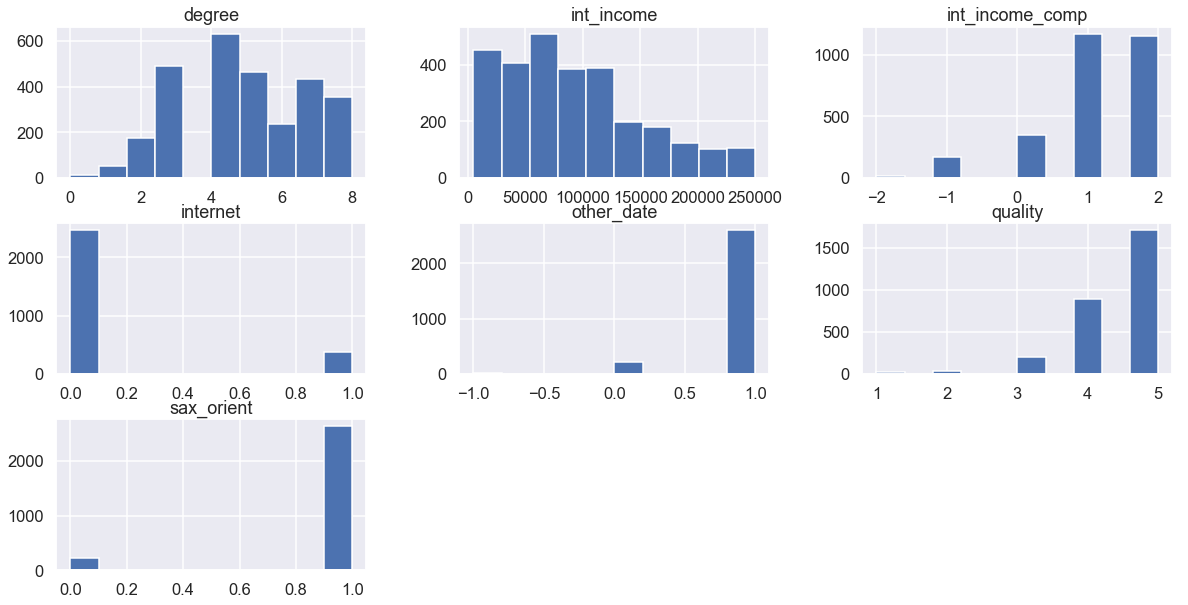

In [26]:
# plot graphs to see if data is normal visually
pl_columns = df_individual.hist(figsize=(20,10))

In [27]:
# run regression to test, use quality as measure of quality of relationship
outcome_1, predictors_1 = patsy.dmatrices("quality ~ int_income + int_income_comp + degree + internet + sax_orient + other_date", df_individual[:2277])
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

# show the result of regression
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     31.16
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           3.67e-36
Time:                        19:12:10   Log-Likelihood:                -2453.5
No. Observations:                2277   AIC:                             4921.
Df Residuals:                    2270   BIC:                             4961.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8012      0.084     45.210      0.000       3.636       3.966
int_income       7.589e-07   2.67e-07      2.842      0.005    2.35e-07    1.28e-06
int_income_comp    -0.0476      0.017     -2.851      0.004      -0.080      -0.015
degree              0.0379      0.009      4.315      0.000       0.021       0.055
internet           -0.0430      0.045     -0.946      0.344      -0.132       0.046
sax_orient          0.0101      0.060      0.168      0.866      -0.108       0.128
other_date          0.5295      0.048     10.921      0.000       0.434       0.625
==============================================================================
Omnibus:                      727.887   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2329.534
Skew:                          -1.612   Prob(JB):                         0.00
Kurtosis:                       6.762   Cond. No.                     7.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# calculate the mean squared error
df_1 = df_individual[["int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]][2277:]

# original value
original_quality = df_individual["quality"][2277:]

# add constant
df_1['Intercept'] = [3.8012] * 570

# predicted value
predicted_quality = res_1.predict(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]])

# calculate mean squared error
mean_squared_error(original_quality, predicted_quality)  

114.43241582370331

<h3> 3. Predict the rest 20% using current model </h3>

In [29]:
# predict the rest 20% using the current model
# quality ~ int_income + int_income_comp + degree + internet + sax_orient + other_date"
df_1 = df_individual[["int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]][2277:]

# add constant
df_1['Intercept'] = [3.8012] * 570

res_1.predict(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]]).head()

2819    15.14
2820    15.11
2821    15.08
2822    14.98
2823    15.11
dtype: float64

<h3> 4. Conclusion for regression model 1 and switch to regression model 2</h3>
<p>From the above result, we can know that we have a pretty low R-squared and our mean squared error is pretty large
The predicted value is around 15, which is far away from what we expected(0-5)
From the normality test, because the p value is too small, we can derive a conclusion that our data is not normal
and we may need to normalize the data before we run regression</p>

In [30]:
# try to normalize the data using log transformation
df_individual_cy = copy.deepcopy(df_individual)

# eliminate negative values and apply log transform
df_individual_cy['degree'] = df_individual_cy['degree'] + 1
df_individual_cy['degree'] = df_individual_cy['degree'].apply(np.log)

df_individual_cy['int_income_comp'] = df_individual_cy['int_income_comp'] + 3
df_individual_cy['int_income_comp'] = df_individual_cy['int_income_comp'].apply(np.log)

df_individual_cy['int_income'] = df_individual_cy['int_income'].apply(np.log)

In [31]:
# test normality of data
st_de = stats.normaltest(df_individual_cy['degree'])
st_in = stats.normaltest(df_individual_cy['int_income'])
st_in_cmp = stats.normaltest(df_individual_cy['int_income_comp'])
st_intrnt = stats.normaltest(df_individual_cy['internet'])
st_sax = stats.normaltest(df_individual_cy['sax_orient'])
st_date = stats.normaltest(df_individual_cy['other_date'])
st_quality = stats.normaltest(df_individual_cy['quality'])

print(st_de, '\n', st_in, '\n', st_in_cmp, '\n', st_intrnt, '\n', st_sax, '\n', st_date, '\n', st_quality)

NormaltestResult(statistic=370.3911571976351, pvalue=3.720335802499582e-81) 
 NormaltestResult(statistic=294.61158182332576, pvalue=1.0614703185342484e-64) 
 NormaltestResult(statistic=1107.1721146184423, pvalue=3.807413557620934e-241) 
 NormaltestResult(statistic=1084.7623254329494, pvalue=2.798040162435333e-236) 
 NormaltestResult(statistic=1822.9332719357062, pvalue=0.0) 
 NormaltestResult(statistic=2048.090970282453, pvalue=0.0) 
 NormaltestResult(statistic=924.6411859626222, pvalue=1.6470910145760836e-201)


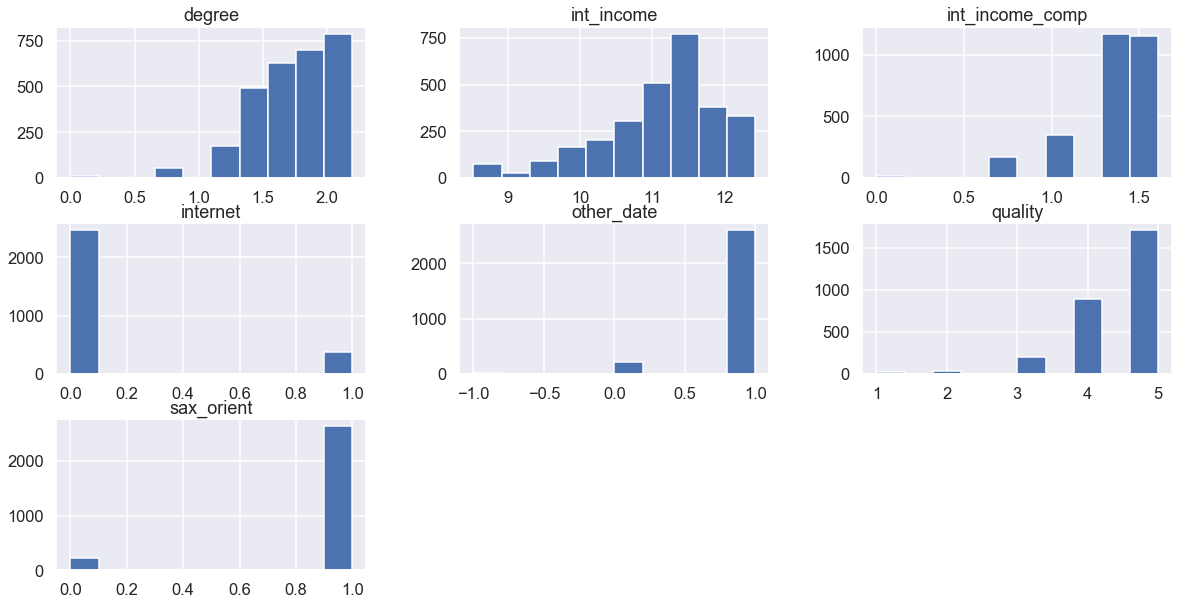

In [32]:
# look at chart to test normality
pl_columns = df_individual_cy.hist(figsize=(20,10))

In [33]:
# display the log transformed table
df_individual_cy[['degree', 'int_income', 'int_income_comp', 'internet', 'other_date', 'quality', 'sax_orient']].head()

,degree,int_income,int_income_comp,internet,other_date,quality,sax_orient
1,2.20,12.00,1.39,0,1,5,1
2,1.95,12.32,1.61,1,1,4,1
4,2.08,12.14,1.39,0,1,5,1
5,1.95,11.29,1.39,0,1,4,1
6,1.61,10.92,1.39,0,1,5,1


In [34]:
# run regression to test, use quality as measure of quality of relationship
outcome_1, predictors_1 = patsy.dmatrices("quality ~ int_income + int_income_comp + degree + internet + sax_orient + other_date", df_individual_cy[:2277])
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [35]:
# show the result of regression
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     33.03
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           2.35e-38
Time:                        19:12:11   Log-Likelihood:                -2448.4
No. Observations:                2277   AIC:                             4911.
Df Residuals:                    2270   BIC:                             4951.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0615      0.215     14.268      0.000       2.641       3.482
int_income          0.0802      0.020      3.945      0.000       0.040       0.120
int_income_comp    -0.1866      0.057     -3.301      0.001      -0.298      -0.076
degree              0.1824      0.047      3.853      0.000       0.090       0.275
internet           -0.0333      0.046     -0.732      0.464      -0.123       0.056
sax_orient          0.0059      0.060      0.099      0.921      -0.112       0.123
other_date          0.5251      0.048     10.837      0.000       0.430       0.620
==============================================================================
Omnibus:                      713.606   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2237.406
Skew:                          -1.587   Prob(JB):                         0.00
Kurtosis:                       6.675   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>5. Predict the rest 20% using current model </h3>

In [36]:
# predict the rest 20% using the current model
# quality ~ int_income + int_income_comp + degree + internet + sax_orient + other_date"
df_1 = df_individual_cy[["int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]][2277:]

# add constant
df_1['Intercept'] = [3.0615] * 570

res_1.predict(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]]).head()

2819    10.85
2820    10.74
2821    10.73
2822    10.51
2823    10.79
dtype: float64

In [37]:
# calculate the mean squared error

# original value
original_quality = df_individual_cy["quality"][2277:]

# predicted value
predicted_quality = res_1.predict(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sax_orient", "other_date"]])

# calculate mean squared error
mean_squared_error(original_quality, predicted_quality)  

40.631486056759364

<h3>6. Model Analysis </h3>
<h4>Although we have a much smaller mean squared error and our predicted value is closer to 0-5, our model still fails! We found our several reasons that could possibly made our model failed</h4>
    <li>1. Samples might not be experimentally randomly selected
            <p>It is possible that our data is not from a perfect random sampling, which violates the OLS estimator assumption</p>
     </li>
    
   


 <li>2. No linear relationship between dependent variable and independent variable</li>

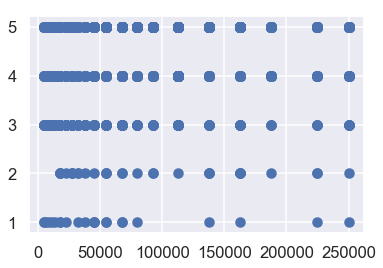

In [38]:
# draw scatter plot between quality and income
plt.scatter(df_individual["int_income"], df_individual["quality"])

<p>As the example shown above, due to the categorical nature of our data, there is no obvious linear relationship between income and quality of relationship, we cannot directly run regression with income and quality.</p>

 <li>3. strong multicollinearity problems </li>
 <p>As the result of regression shown above, there are possible multicollinearity in our model, which will affect the precision of our regression model. For exmaple, it is possible that income is correleated with education level.</p>

In [39]:
df_individual[['int_income', 'degree']].corr()

,int_income,degree
int_income,1.00,0.46
degree,0.46,1.00


 <li>4. Omitted variable bias </li>
 <p>We only includes serveral variables that we want to analyze in our regression model, it is possible that there are still other relevant variable that could possibly influence on the quality of relationship but we did not include in our regression model. And those variable will be explained by variable included in our current regression model, which will also decrease the effectiveness of our regression model</p>

<p>Becuase of the nature of our dataset (categorical variable, binary variables) and all the possible reasons listed above that could possible cause our model to fail, we may need to consider another model that works better than linear regression</p>

<h2>Second Model: Decision Tree </h2>

In [42]:
df_individual.columns

Index(['degree', 'internet', 'sax_orient', 'race_partner', 'race_answerer',
       'quality', 'sex_freq', 'other_date', 'int_income', 'int_income_comp'],
      dtype='object')

In [40]:
df_individual['int_income']

1       162499.5
2       224999.5
4       187499.5
          ...   
3507    137499.5
3508     67499.5
3509     44999.5
Name: int_income, Length: 2847, dtype: float64

<p> Add a separate column here 'comp_degree' that determines the degree of both the partner and the interviewee

In [44]:
df_individual['race_answerer'].unique()

array(['White', 'Black', 'Some other race', 'Asian Indian ',
       'American Indian', 'Japanese ', '0', 'Chinese ', 'Guamanian',
       'Other Asian', 'Filipino ', 'Korean', 'Refused', 'Hawaiian',
       'Vietnamese', 'Samoan', 'Other Pacific Islander'], dtype=object)

In [45]:
df_individual['int_race_answerer'] = df_individual['race_answerer'].map({
    'White':0, 'Black':1, 'Some other race':2, 'Asian Indian ':3,
       'American Indian':4, 'Japanese ':5, 'Chinese ':6, 'Guamanian':7,
       'Other Asian':8, 'Filipino ':9, 'Korean':10, 'Refused':-1, 'Hawaiian':11,
       'Vietnamese':12, 'Samoan':13, 'Other Pacific Islander':14
})

In [46]:
df_individual['int_race_answerer'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  7.,  8.,  9., 10., -1.,
       11., 12., 13., 14.])

<p>
    <b>For Decision Trees</b>
    <br/>
    We want to take a copy of our data_frame, to clean it for decision trees
</p>

In [47]:
df_trees = copy.copy(df_individual)

In [49]:
df_individual.columns

Index(['degree', 'internet', 'sax_orient', 'race_partner', 'race_answerer',
       'quality', 'sex_freq', 'other_date', 'int_income', 'int_income_comp',
       'int_race_answerer'],
      dtype='object')

<p>
   We only choose the columns of most importance to us, we drop na values and we drop those who have refused to answer quality
<p>

In [50]:
df_trees = df_trees[['degree','internet','sax_orient','int_income','int_income_comp','other_date','quality']]
df_trees = df_trees.dropna()
df_trees = df_trees[df_trees['quality'] != 'Refused']

<h1>Decision Trees, part 1</h1>
    
<p>
    Given that our data did not appear to be normally distributed, we decided then we should shift our focus to
    create a decision tree model.     
    In order to build our decision trees, we decided that our features would 
    be comprised of the following:
    <ul>
        <li> Degree of the answerer</li>
        <li> Whether the relationship began from internet use </li>
        <li> The income of the answerer </li>
        <li> The combined income of the answerer and their partner </li>
        <li> Whether or not the answerer cheated on the partner </li>
    </ul>
    <br>
</p>

In [51]:
# Get valid features
df_features = df_trees[['degree','internet','sax_orient','int_income','int_income_comp','other_date']]

# Obtain the labels
df_labels = df_trees['quality']
df_labels=df_labels.astype('int')

<p>Using sklearns train_test_split model, we create training and testing data from our features and labels</p>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, random_state=1)

We create a DecisionTreeClassifer using sklearn 

In [53]:
model = tree.DecisionTreeClassifier()

In [54]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
# Fit the model with our training and testing data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
# Obtain predicitions from model using X_test
y_predict = model.predict(X_test)

In [57]:
accuracy_score(y_test, y_predict)

0.4803370786516854

<h1>Decision Trees, part 2</h1>
    
<p>
    Our decision tree model did not have a high accuracy (around 50%) 
    <br>
    We wondered if the reason for this could have been the range of our labels. 
    Our team did some research and found that decision trees work better with a binary label, whereas our labels ranged from 5-0 
    <br>
    <br>
    Therefore, we decided to change the labels of our decision tree to binary. 
    Given that our labels 5-3 were originally values that ranged from "Excellent" to "Fair" we 
    decided that these would be considered could be considered as "good" relationships. Therefore we made the following change:
    <br>
    <br>
    <b>Labels 5-3 became label 1, and the remaining labels would be 0</b>
</p>

In [58]:
dic = {5:1, 4:1, 3:1, 2:0, 1:0}
df_labels.replace(dic, inplace=True)

In [59]:
df_labels.head()

1    1
2    1
4    1
5    1
6    1
Name: quality, dtype: int64

<p>
    We begin to build the tree again.
</p>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, random_state=1)

In [61]:
model = tree.DecisionTreeClassifier()

In [62]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
y_predict = model.predict(X_test)

In [65]:
accuracy_score(y_test, y_predict)

0.9592696629213483

<p>
    Our accuracy increased significantly, to over 95%
    <br>
    For this decision tree model, we also decided to create a visual representation for the tree
</p>

In [66]:
dot_data = io.StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=df_features.columns)


In [67]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph

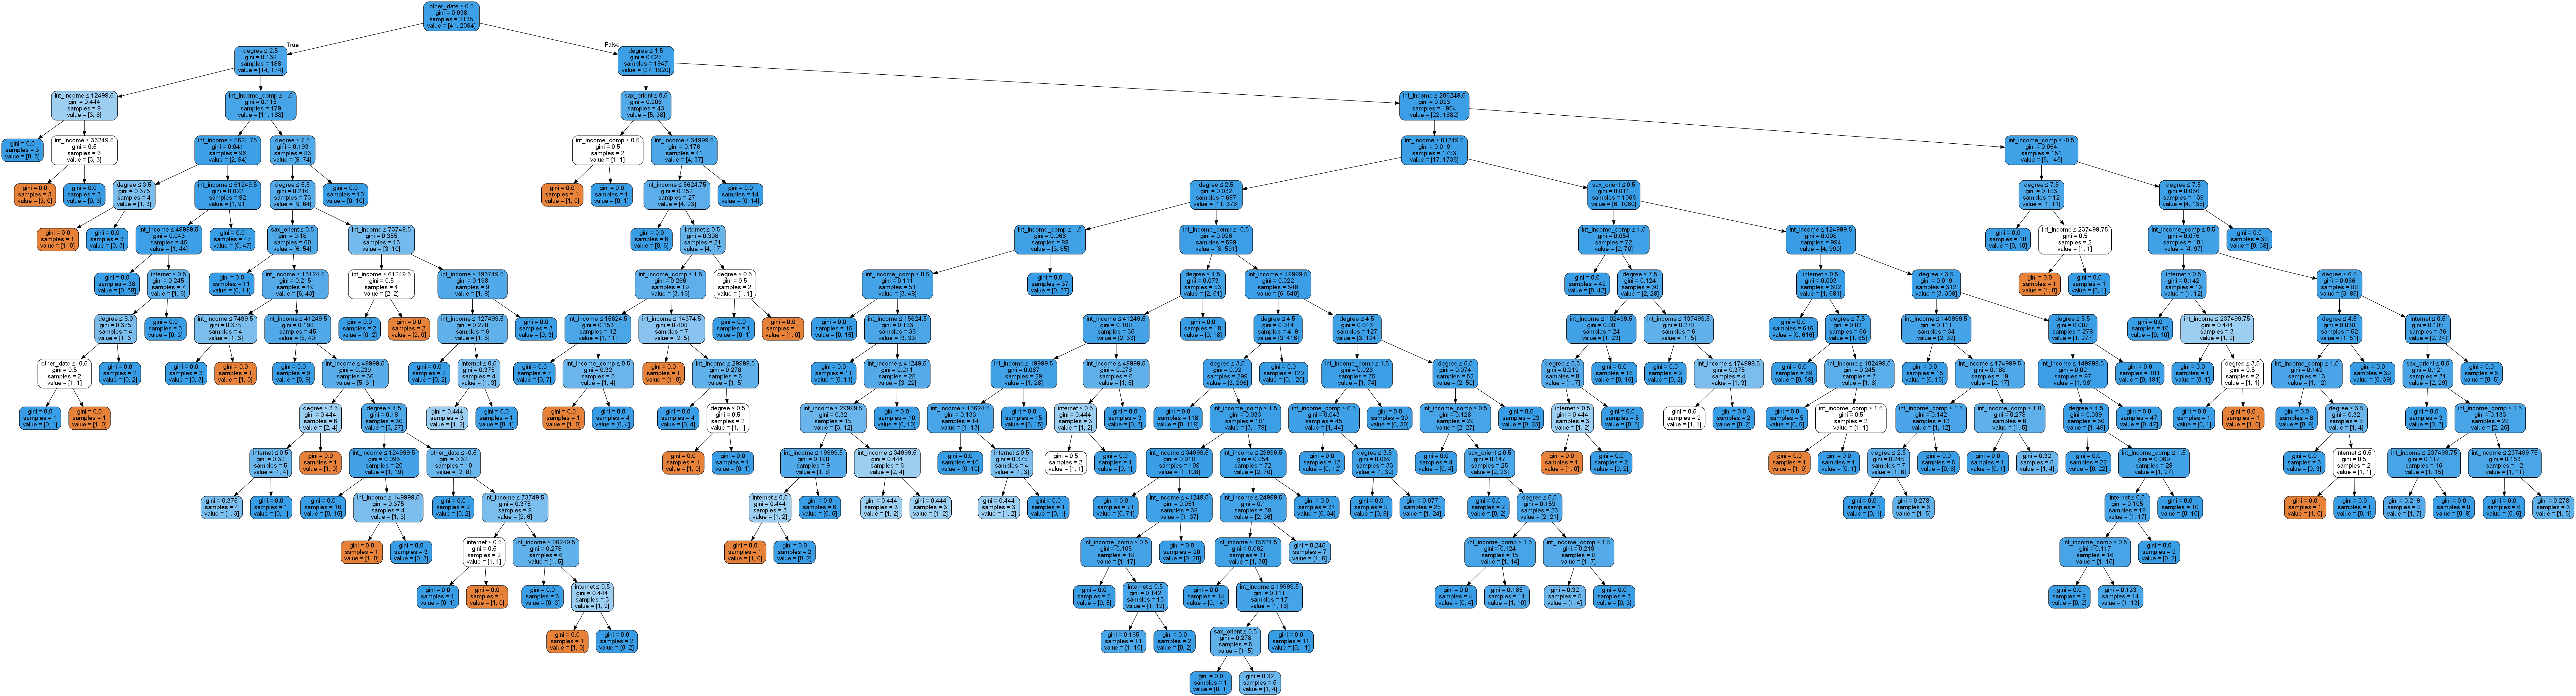

In [68]:
Image(graph.create_png())

<h1>Decision Trees: Conclusion </h1>
<p>
    Our 2nd decision tree model was very successful in predicting the labels of our testing data, with an accuracy of over 
    90%.
    <br>
    <br>
    Decision Tree Models attempt to place the features that have the highest impact in predicting the labels higher up the 
    tree. Based on our model, it seems that the features that have the highest impact are the 'other_date' and 'degree', with 
    the 'int_income' following after. 
    <br>
    <br> 
    Based on this, it appears that the most important features on determining the quality of the relationship are whether 
    there was cheating involved, at least for our data set. 
</p>

## Ethical Consideration

<p style="font-size:15px">All participants were 18 years of age or older and provided consent to participate in the study. An oversample of LGBT couple information was taken to provide further insight on minority sexual orientation groups. All responses have been removed of identifiable information. Because our data analysis team did not have direct contact with those participating in the questionnaire or the team gathering the data, this further protects the privacy of the participants. The implications of this study may have effects on dating app companies, either raising or decreasing popularity, based on our findings. This would affect any stakeholders in the online dating industry. Personal biases that may have an effect on how this study is conducted is our group’s minimal personal experience with online dating.
</p>